In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import snowflake.connector

In [2]:
conn = snowflake.connector.connect(
user = "EMADAM",
password = "Emad646261." ,
account = "MRVLRCM-BA89847" ,
database = "python_assessment" ,
schema = "python_assessment"
)

cur = conn.cursor()
cur.execute('select * from "spotify_4"')

df = cur.fetch_pandas_all()

conn.close()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32833 non-null  object 
 2   track_artist              32833 non-null  object 
 3   track_popularity          32833 non-null  int8   
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32833 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int8   
 14  loudne

In [ ]:
#### What are the top 5 most popular artists?

In [5]:
top_artists = df.groupby('track_artist')['track_popularity'].mean().sort_values(ascending=False).head(5)
print(top_artists)


track_artist
Trevor Daniel    97.000000
Y2K              91.000000
Don Toliver      90.714286
Roddy Ricch      88.210526
DaBaby           87.857143
Name: track_popularity, dtype: float64


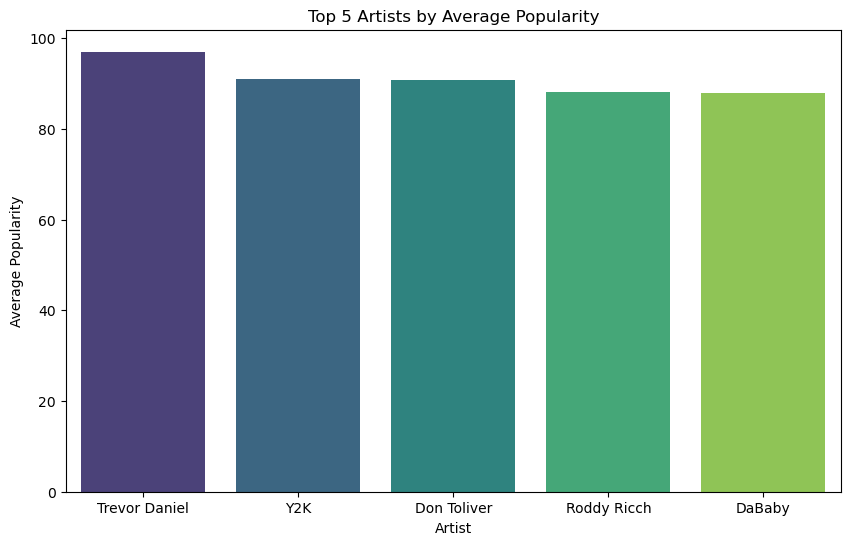

In [6]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_artists.index, y=top_artists.values, palette='viridis', orient='v')
plt.title('Top 5 Artists by Average Popularity')
plt.xlabel('Artist')
plt.ylabel('Average Popularity')
plt.show()

In [7]:
# What genres are the top 5 most popular artists working in?
#Show a pie chart showing the split of genres of tracks produced
#by the top 5 artist (25% pop, 40% EDM etc.)


# Find the top 5 most popular artists
top_artists = df.groupby('track_artist')['track_popularity'].mean().nlargest(5).index

# Filter the DataFrame for tracks by the top 5 artists
top_tracks = df[df['track_artist'].isin(top_artists)]

# Get the count of tracks in each genre
genre_counts = top_tracks['playlist_genre'].value_counts()

print(genre_counts)


playlist_genre
rap      24
r&b      13
latin     7
edm       6
pop       3
Name: count, dtype: int64


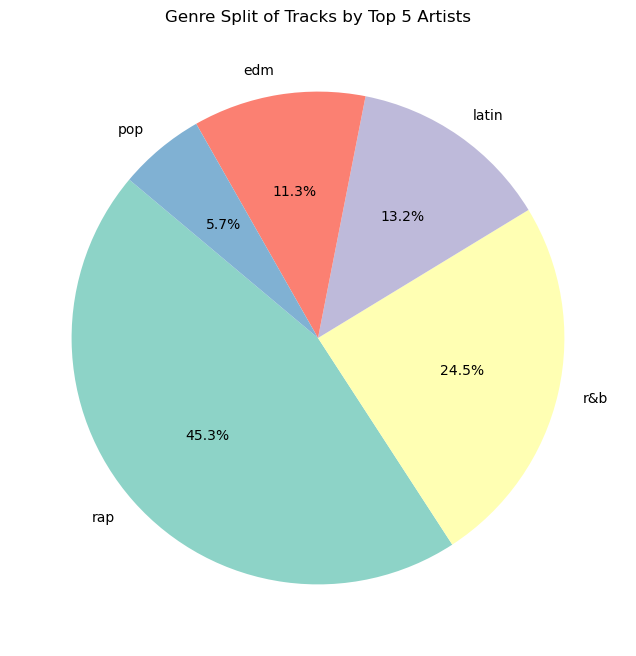

In [8]:
# What genres are the top 5 most popular artists working in?
#Show a pie chart showing the split of genres of tracks produced
#by the top 5 artist (25% pop, 40% EDM etc.)

# Choose a different Seaborn color palette
custom_palette = sns.color_palette('Set3')

# Plot a pie chart with a custom Seaborn color palette
plt.figure(figsize=(10, 8))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140, colors=custom_palette)
plt.title('Genre Split of Tracks by Top 5 Artists')
plt.show()


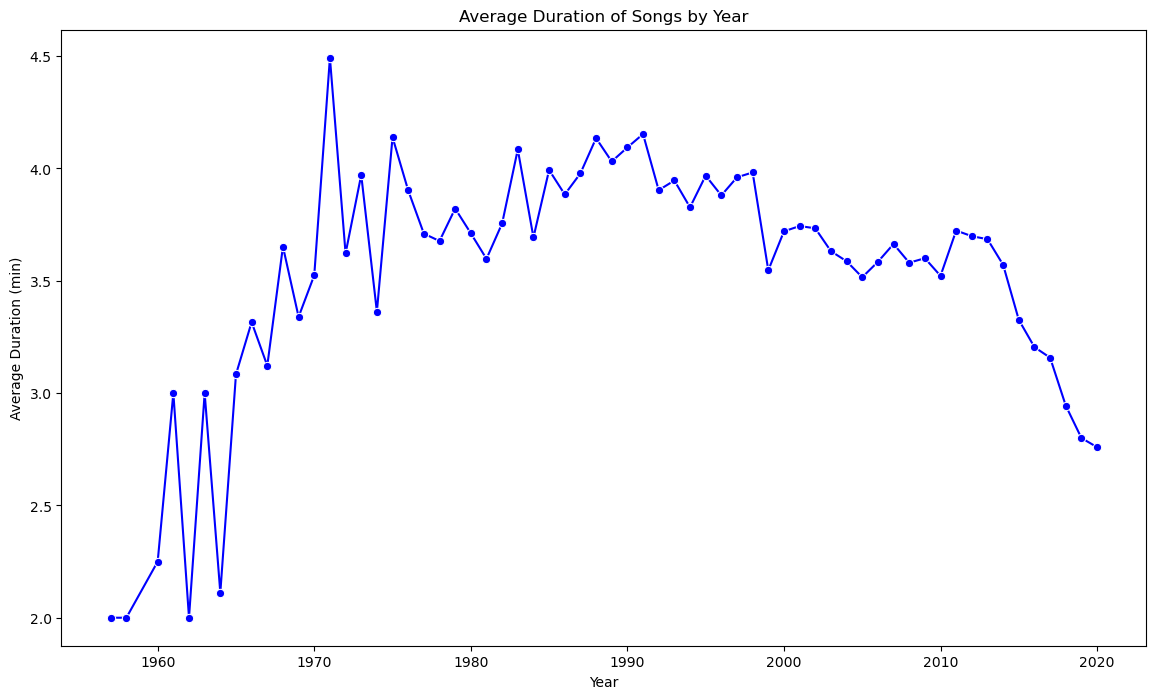

In [9]:
#Are songs getting shorter?
#Show a plot showing average duration by year

# Extract the year from the release date
df['release_year'] = pd.to_datetime(df['track_album_release_date']).dt.year


# Plot average duration by year
average_duration_by_year = df.groupby('release_year')['duration_min'].mean()

plt.figure(figsize=(14, 8))
sns.lineplot(x=average_duration_by_year.index, y=average_duration_by_year.values, marker='o', color='blue')
plt.title('Average Duration of Songs by Year')
plt.xlabel('Year')
plt.ylabel('Average Duration (min)')
plt.show()
#print(average_duration_by_year)


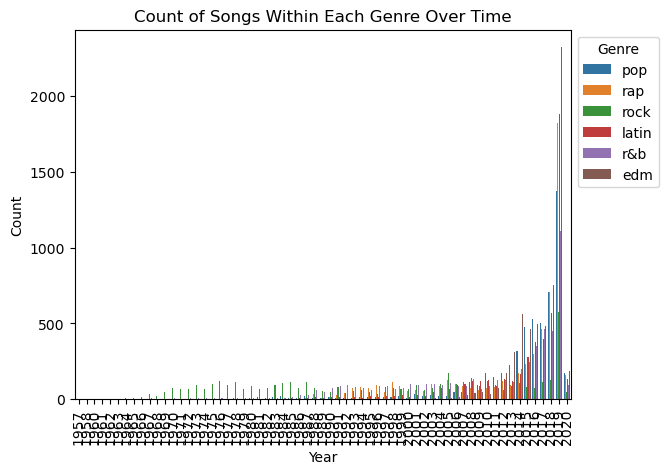

In [10]:
#How has genres evolved over time?
#Show a plot showing count of songs within a genre each year


# Extract the year from the release date
df['release_year'] = pd.to_datetime(df['track_album_release_date']).dt.year

# Plot count of songs within each genre for each year
sns.countplot(x='release_year', hue='playlist_genre', data=df)
plt.title('Count of Songs Within Each Genre Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Genre', bbox_to_anchor=(1, 1))
plt.show()


In [11]:
# Group by genre and calculate the average danceability for each genre
average_danceability = df.groupby('playlist_genre')['danceability'].mean()

# Get the top 5 most danceable genres
top_danceable_genres = average_danceability.nlargest(5)
print(top_danceable_genres)

playlist_genre
rap      0.718353
latin    0.713287
r&b      0.670179
edm      0.655041
pop      0.639302
Name: danceability, dtype: float64


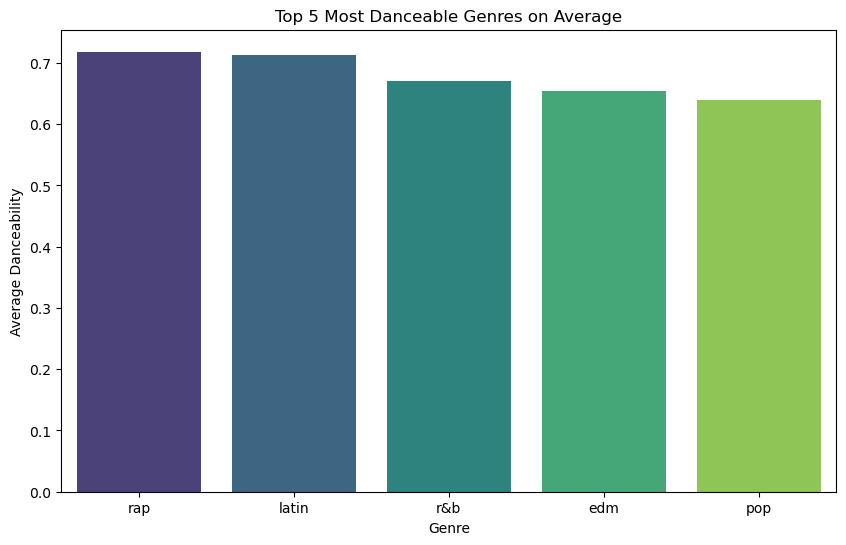

In [12]:
# Plot a vertical bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_danceable_genres.index, y=top_danceable_genres.values, palette='viridis')
plt.title('Top 5 Most Danceable Genres on Average')
plt.xlabel('Genre')
plt.ylabel('Average Danceability')
plt.show()

In [13]:
df

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_min,release_year
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,3,2019
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,2,2019
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,2,2019
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-3.778,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,2,2019
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-4.672,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,42,2azRoBBWEEEYhqV6sb7JrT,City Of Lights (Vocal Mix),2014,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,3,2014
32829,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,6kD6KLxj7s8eCE3ABvAyf5,Closer Remixed,2013,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,5,2013
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),2014,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,3,2014
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),2014,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,6,2014


In [14]:
df.isna().sum()

track_id                    0
track_name                  0
track_artist                0
track_popularity            0
track_album_id              0
track_album_name            0
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_min                0
release_year                0
dtype: int64